# Code Demo of CLT Team
## Team member: Akhil Gopi, Ajayeswar Reddy Peddyreddy, Xizhi (Max) Ma

In [4]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
# calculating pmf of a fair and unfair die 
fair_die_weights = {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1}
unfair_die_weights = {1: 100, 2: 1123, 3: 12, 4: 1244, 5: 2241, 6: 112}
pmf_fair_die = list()
pmf_unfair_die = list()
for key in fair_die_weights:
    pmf_fair_die.append(
        [
            key,
            round(
                fair_die_weights[key] / sum(fair_die_weights.values()),
                6,
            ),
        ]
    )
for key in unfair_die_weights:
    pmf_unfair_die.append(
        [
            key,
            round(
                unfair_die_weights[key] / sum(unfair_die_weights.values()),
                6,
            ),
        ]
    )

pmf_fair_die.sort(key=lambda x: x[0])
pmf_unfair_die.sort(key=lambda x: x[0])
pmf_fair_die, pmf_unfair_die

([[1, 0.166667],
  [2, 0.166667],
  [3, 0.166667],
  [4, 0.166667],
  [5, 0.166667],
  [6, 0.166667]],
 [[1, 0.020695],
  [2, 0.232409],
  [3, 0.002483],
  [4, 0.25745],
  [5, 0.463783],
  [6, 0.023179]])

In [8]:
# imagine flipping a die
def func_cdf(pmf):
    '''
    This function takes a pdf/pmf (fair or unfair die) as an input 
    and outputs a cdf function.The CDF output is slightly different 
    in that it also attaches the previous value's Cumulative probability 
    to the next value. This is to make it easier to find the inverse cdf
    as the input is a piece wise function
    '''
    cdf = list()
    for i in range(len(pmf)):
        if i == 0:
            cdf.append([pmf[i][0], [0, pmf[i][1]]])
        elif i == len(pmf) - 1:
            cdf.append([pmf[i][0], [cdf[i - 1][1][1], 1]])
        else:
            cdf.append([pmf[i][0], [cdf[i - 1][1][1], cdf[i - 1][1][1] + pmf[i][1]]])
    return cdf


def inv_cdf(x, cdf):
    '''
    This function takes a cdf (fair or unfair die) and a cumulative
    probability (between 0 and 1) as an input and outputs the 
    corresponding random variable's value which will produce the 
    equivalent input cumulative probability for the given cdf. 
    i.e output=inverse_cdf(input) 
    '''
    for item in cdf:
        if x > item[1][0] and x <= item[1][1]:
            return item[0]


def exp_val(pmf):
    '''
    This function takes a pmf and returns the expected value of the pdf. 
    It expects the pdf in the form of (value,probability) pairs. 
    '''
    i = 0
    for k in pmf:
        i += k[0] * k[1]
    return i


def func_obs(n, k, pmf):
    '''
    This function generates 'k' no of samples with a sample size 
    of 'n' random realizations from a distribution by generating 
    a random number between 0 and 1 and then passing this number 
    through an inverse cdf function. 
    '''
    output_list = list()
    if str(pmf) != "norm":
        cdf = func_cdf(pmf)
    for i in range(k):
        sample_list = list()
        for j in range(n):
            x = np.random.uniform(0, 1)
            if str(pmf) != "norm":
                sample_list.append(inv_cdf(x, cdf))
            else:
                sample_list.append(st.norm.ppf(x))
        output_list.append(sum(sample_list) / len(sample_list))
    return output_list

In [9]:
means_list1 = func_obs(n=30, k=1, pmf=pmf_fair_die)
means_list2 = func_obs(n=30, k=10, pmf=pmf_fair_die)
means_list3 = func_obs(n=30, k=50, pmf=pmf_fair_die)
means_list4 = func_obs(n=30, k=100, pmf=pmf_fair_die)
means_list5 = func_obs(n=30, k=500, pmf=pmf_fair_die)
means_list6 = func_obs(n=30, k=20000, pmf=pmf_fair_die)

In [11]:
def means_count(output_list, mean_dict):
    '''
    This function takes an input list and outputs a dict 
    with unique elements from the input list as the 
    dict's keys and their counts as dict's values. 
    '''
    for each in output_list:
        if each in mean_dict:
            mean_dict[each] += 1
        else:
            mean_dict[each] = 1
    return mean_dict

In [12]:
means1, means2, means3, means4, means5, means6 = {}, {}, {}, {}, {}, {}

means1 = means_count(means_list1, means1)
means2 = means_count(means_list2, means2)
means3 = means_count(means_list3, means3)
means4 = means_count(means_list4, means4)
means5 = means_count(means_list5, means5)
means6 = means_count(means_list6, means6)

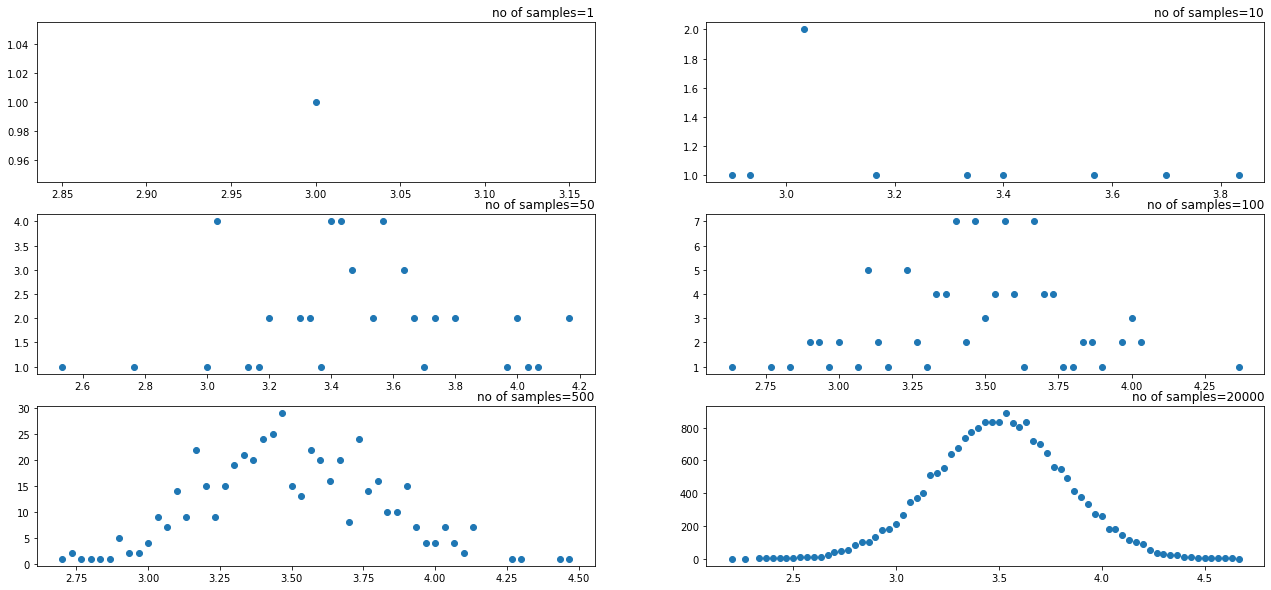

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(22, 10))
ax[0][0].scatter(means1.keys(), means1.values())
ax[0][1].scatter(means2.keys(), means2.values())
ax[1][0].scatter(means3.keys(), means3.values())
ax[1][1].scatter(means4.keys(), means4.values())
ax[2][0].scatter(means5.keys(), means5.values())
ax[2][1].scatter(means6.keys(), means6.values())

ax[0][0].set_title("no of samples=1", loc="right")
ax[0][1].set_title("no of samples=10", loc="right")
ax[1][0].set_title("no of samples=50", loc="right")
ax[1][1].set_title("no of samples=100", loc="right")
ax[2][0].set_title("no of samples=500", loc="right")
ax[2][1].set_title("no of samples=20000", loc="right")

plt.show()

In [14]:
fdie_ss_2 = func_obs(n=2, k=20000, pmf=pmf_fair_die)
fdie_ss_50 = func_obs(n=50, k=20000, pmf=pmf_fair_die)
ufdie_ss_2 = func_obs(n=2, k=20000, pmf=pmf_unfair_die)
ufdie_ss_50 = func_obs(n=50, k=20000, pmf=pmf_unfair_die)
norm_ss_2 = func_obs(n=2, k=20000, pmf="norm")
norm_ss_50 = func_obs(n=50, k=20000, pmf="norm")

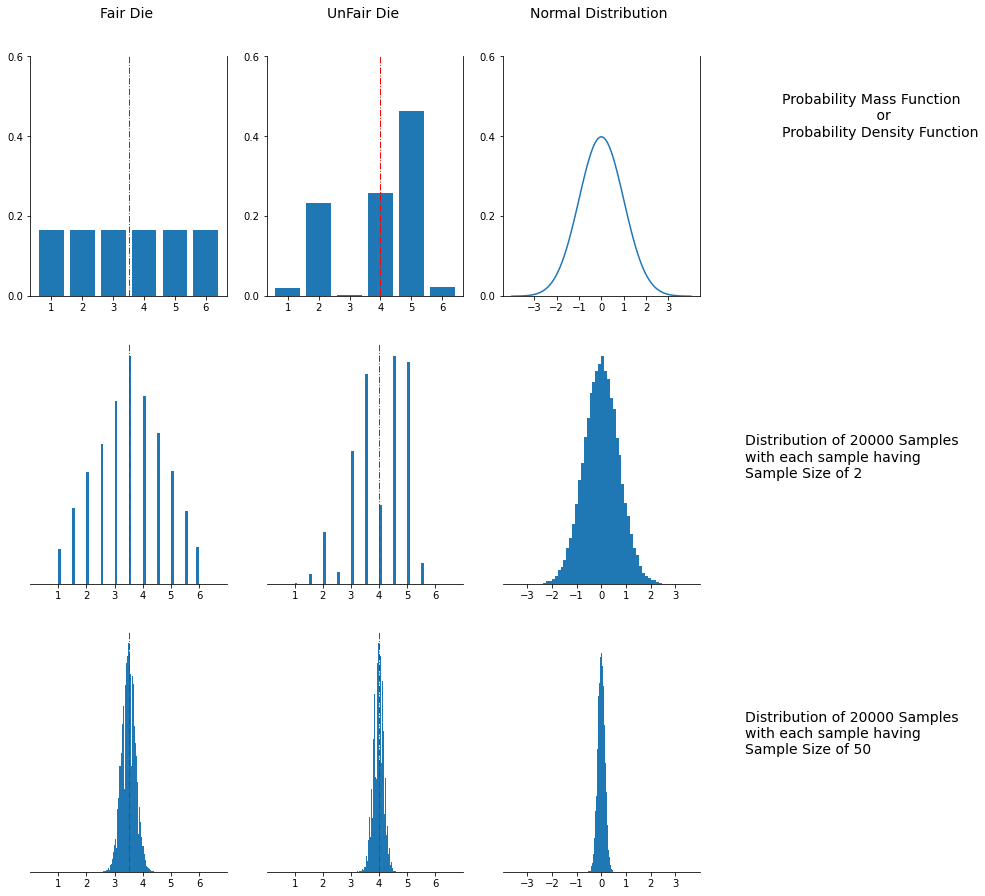

In [17]:
from cProfile import label

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 15))
binsize = 50
ax[0][0].bar([val[0] for val in pmf_fair_die], [val[1] for val in pmf_fair_die])
ax[0][1].bar([val[0] for val in pmf_unfair_die], [val[1] for val in pmf_unfair_die])
x = np.linspace(-4, +4, 100)
ax[0][2].plot(x, st.norm.pdf(x, 0, 1))

ax[1][0].hist(fdie_ss_2, bins=binsize)
ax[2][0].hist(fdie_ss_50, bins=binsize)
ax[1][1].hist(ufdie_ss_2, bins=binsize)
ax[2][1].hist(ufdie_ss_50, bins=binsize)
ax[1][2].hist(norm_ss_2, bins=binsize)
ax[2][2].hist(norm_ss_50, bins=binsize)

ax[0][0].set_ylim([0, 0.6])
ax[0][0].set_yticks([0, 0.2, 0.4, 0.6])
ax[0][0].set_xticks(list(range(1, 7)))
ax[0][1].set_ylim([0, 0.6])
ax[0][1].set_yticks([0, 0.2, 0.4, 0.6])
ax[0][1].set_xticks(list(range(1, 7)))
ax[0][2].set_ylim([0, 0.6])
ax[0][2].set_yticks([0, 0.2, 0.4, 0.6])
ax[0][2].set_xticks(list(range(-3, 4)))

for i in range(1, 3):
    for j in range(3):
        if j == 2:
            ax[i][j].set_xlim([-4, 4])
            ax[i][j].set_xticks(list(range(-3, 4)))
        else:
            ax[i][j].set_xlim([0, 7])
            ax[i][j].set_xticks(list(range(1, 7)))

ax[0][0].set_title("Fair Die \n\n", fontsize=14)
ax[0][1].set_title("UnFair Die \n\n", fontsize=14)
ax[0][2].set_title("Normal Distribution \n\n", fontsize=14)

ax[0][1].text(
    17,
    0.4,
    "Probability Mass Function\n                     or\nProbability Density Function",
    fontsize=14,
)
ax[1][1].text(
    17,
    2200,
    "Distribution of 20000 Samples\nwith each sample having\nSample Size of 2",
    fontsize=14,
)
ax[2][1].text(
    17,
    900,
    "Distribution of 20000 Samples\nwith each sample having\nSample Size of 50",
    fontsize=14,
)

ax[0][0].axvline(x=exp_val(pmf_fair_die), color="r", linestyle="-.", linewidth=1)
ax[1][0].axvline(
    x=sum(fdie_ss_2) / len(fdie_ss_2), color="r", linestyle="-.", linewidth=1
)
ax[2][0].axvline(
    x=sum(fdie_ss_50) / len(fdie_ss_50), color="r", linestyle="-.", linewidth=1
)
ax[0][1].axvline(x=exp_val(pmf_unfair_die), color="r", linestyle="-.", linewidth=1)
ax[1][1].axvline(
    x=sum(ufdie_ss_2) / len(ufdie_ss_2), color="r", linestyle="-.", linewidth=1
)
ax[2][1].axvline(
    x=sum(ufdie_ss_50) / len(ufdie_ss_50), color="r", linestyle="-.", linewidth=1
)

for i in range(3):
    for j in range(3):
        if i >= 1:
            ax[i][j].spines["left"].set_visible(False)
            ax[i][j].spines["right"].set_visible(False)
            ax[i][j].tick_params(axis="y", left=False, labelleft=False)
        ax[i][j].spines["top"].set_visible(False)
plt.show()